## Install 

In [ ]:
! pip install newspaper3k
! pip install -U spacy
! pip install nltk
! pip install scikit-plot
! pip install umap-learn

     |████████████████████████████████| 211 kB 4.1 MB/s 
     |████████████████████████████████| 87 kB 5.1 MB/s 
     |████████████████████████████████| 81 kB 8.0 MB/s 
     |████████████████████████████████| 7.4 MB 16.0 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=687fcc129488e6bc707e38ceeb3b65a2edf0028667a8899f5040cb49d936153e
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=627750d5911ef2b7f3d72e7445974a957ec22e89cf0943154098d8d53a8f4a4d
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=fbcc5a5de032215966334467a6f5c3888483bf3f5b887cb92e676703a4d6ed72
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

In [ ]:
# plot 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

import spacy
from spacy import cli 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# compression
from sklearn.decomposition import PCA
from sklearn import metrics 
from umap import UMAP


from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
ok_text = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/text.csv')

In [ ]:
ok_text.sample(3)

,id,Full_essay,location
1913,12472,"i'm shy, and terrible at writing about myself....","san francisco, california"
4561,29829,"i am very honest, loving, person. things what ...","san francisco, california"
4720,30750,i am a 39 year old single woman in san francis...,"san francisco, california"


In [ ]:
ok_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          9055 non-null   int64 
 1   Full_essay  8804 non-null   object
 2   location    9055 non-null   object
dtypes: int64(1), object(2)
memory usage: 212.4+ KB


In [ ]:
ok_text.Full_essay

0       about me:  i would love to think that i was so...
1       i am a chef: this is what that means. 1. i am ...
2       writing. meeting new people, spending time wit...
3       i have an awesome career working as a senior m...
4       i relocated to san francisco half a year ago. ...
                              ...                        
9050    my name is peter. i'm an oakland native, and i...
9051    i have lived in sf off and on for 7.5 years no...
9052    i'd like your finest milksteak please. and not...
9053    i'm nick. i never know what to write about mys...
9054    "all i have in this world are my balls and my ...
Name: Full_essay, Length: 9055, dtype: object

## Pre processing 

In [ ]:
# remove puncuation 
def remove_punct(Full_essay):
  import string
  Full_essay = ''.join([p for p in Full_essay if p not in set(string.punctuation)])
  return Full_essay
# convert to string 
ok_text['Full_essay'] = ok_text['Full_essay'].astype(str)
ok_text['Full_essay'] = ok_text.Full_essay.apply(remove_punct)

In [ ]:
# sample set 
# ok_text_sample = ok_text.sample(n=1000)
# ok_text_sample['Full_essay'] = ok_text_sample['Full_essay'].astype(str)
# ok_text_sample['Full_essay'] = ok_text_sample.Full_essay.apply(remove_punct)

In [ ]:
# ok_text_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 4429 to 3324
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   int64 
 1   Full_essay  1000 non-null   object
 2   location    1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.2+ KB


# CV ( Not Using CV for the final results) 

In [ ]:
# unigrams
cv = CountVectorizer(max_features=10000, strip_accents ='ascii', stop_words = 'english')
cv.fit(ok_text.Full_essay)
cv.vocabulary_
print(len(cv.vocabulary_))
# 128806

KeyboardInterrupt: ignored

In [ ]:
cv.get_feature_names_out()

In [ ]:
dtm = cv.transform(ok_text.Full_essay)
dtm.shape
dtm = dtm.toarray()


In [ ]:
# reduce 
pca = PCA(0.9)
pcs = pca.fit_transform(dtm)

In [ ]:
# how much of the variance did we retain?
pca.explained_variance_ratio_.sum()

In [ ]:
cv.get_feature_names_out

In [ ]:
df = pd.DataFrame(dtm , columns=cv.get_feature_names_out())
df.shape
df

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
krange = range(2, 16)

for i in krange:
  knn = KNeighborsClassifier(i)
  knn.fit(dv, .category)
  preds = knn.predict(dv)
  kscore = metrics.accuracy_score(train.category, preds)
  scores.append(kscore)

In [ ]:
# elbow 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
krange = range(2, 11)
ss = []
for k in krange:
    km = KMeans(k)
    labs = km.fit_predict(df)
    ss.append(km.inertia_)
    #skplt.metrics.plot_silhouette(j, km.predict(j), figsize=(7,7))
sns.lineplot(krange, ss)


In [ ]:
# silhouette score
crange = range(2, 11)
ss1 = []
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=820)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_
    score = metrics.silhouette_score(df, preds)
    ss1.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
sns.lineplot(crange, ss1).set(title = ' Silhouette method', xlabel = 'Number of cluster', ylabel ='Average Silhouette score')

In [ ]:
k4 = KMeans(4)
k4.fit(df)
labs = k4.predict(df)
labs

# how many intration ran 
print('There is {} intration'.format(k4.n_iter_))

In [ ]:
import scikitplot as skplt
k4 = KMeans(4)
k4_labs = k4.fit_predict(df)
skplt.metrics.plot_silhouette(df, k4_labs)

In [ ]:
varexp = pca.explained_variance_ratio_
COLS = ['PC' + str(i) for i in range(1, len(varexp)+1)]
COLS

comps = pca.components_

loadings = pd.DataFrame(comps.T, columns=COLS)
loadings

# Spacy (The method I use for the finial result) 

In [ ]:
import spacy
from spacy import cli
from spacy import displacy
model = "en_core_web_md"
cli.download(model)

nlp = spacy.load(model)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
nlp.pipe_names
EXCL = ['tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
docs = list(nlp.pipe(ok_text.Full_essay, disable=EXCL))

In [ ]:
dv = [doc.vector for doc in docs]
dv = np.array(dv)

In [ ]:
# get the dvs for the ok_test sample set
# ok_docs = list(nlp.pipe(ok_text_sample.Full_essay))

# ok_dv = [doc.vector for doc in ok_docs]
# ok_dv = np.array(ok_dv)

# ok_dv.shape

## PCA

In [ ]:
pca = PCA(0.9)
pcs = pca.fit_transform(dv)
pca.explained_variance_ratio_.sum()

0.90202063

## TSNE (Not usinf for the final result)

In [ ]:
from sklearn.manifold import TSNE
# Tsne 
tsne = TSNE()

tsne.fit(pcs)

# get the embeddings
te = tsne.embedding_


# the shape
te.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1000, 2)

In [ ]:
# 2d tsne
tdata = pd.DataFrame(te, columns=['e1', 'e2'])
tdata['y'] = ok_text['id']

tdata.head(3)

,e1,e2,y
0,3.806614,25.156027,0
1,8.452434,31.312216,1
2,4.077350,12.688449,7


In [ ]:
# the plot
PAL = sns.color_palette("bright", 10) 
plt.figure(figsize=(6, 4))
sns.scatterplot(x="e1", y="e2", hue="y", data=tdata, legend="full")

## UMAP 

In [ ]:
# first, apply umap
reducer = UMAP(random_state=82)

# embeddind 
embeds = reducer.fit_transform(pcs)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
embeds.shape

(9055, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


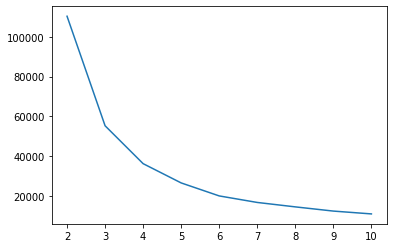

In [ ]:
# using elbow method to determine number of K 
from sklearn.cluster import KMeans, DBSCAN
krange = range(2, 11)
ss = []
for k in krange:
    km = KMeans(k)
    labs = km.fit_predict(embeds)
    ss.append(km.inertia_)
sns.lineplot(krange, ss)

For n_clusters = 2, silhouette score is 0.8020741939544678)
For n_clusters = 3, silhouette score is 0.4363890588283539)
For n_clusters = 4, silhouette score is 0.41764727234840393)
For n_clusters = 5, silhouette score is 0.4177722632884979)
For n_clusters = 6, silhouette score is 0.4164850115776062)
For n_clusters = 7, silhouette score is 0.39566633105278015)
For n_clusters = 8, silhouette score is 0.3822871744632721)
For n_clusters = 9, silhouette score is 0.3971508741378784)
For n_clusters = 10, silhouette score is 0.3892044723033905)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Average Silhouette score'),
 Text(0.5, 0, 'Number of cluster'),
 Text(0.5, 1.0, ' Silhouette method')]

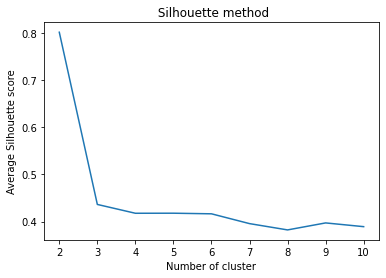

In [ ]:
# silhouette score
crange = range(2, 11)
ss1 = []
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=820)
    preds = clusterer.fit_predict(embeds)
    centers = clusterer.cluster_centers_
    score = metrics.silhouette_score(embeds, preds)
    ss1.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
sns.lineplot(crange, ss1).set(title = ' Silhouette method', xlabel = 'Number of cluster', ylabel ='Average Silhouette score')


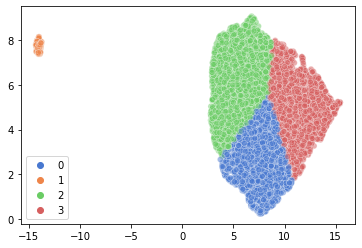

In [ ]:
km = KMeans(4)
km.fit(embeds)

preds = km.predict(embeds)

# lets plot this
sns.scatterplot(x=embeds[:, 0], y=embeds[:, 1], hue=preds, alpha=.5, palette="muted")

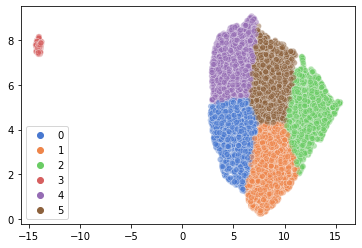

In [ ]:
km = KMeans(6)
km.fit(embeds)

preds = km.predict(embeds)

# lets plot this
sns.scatterplot(x=embeds[:, 0], y=embeds[:, 1], hue=preds, alpha=.5, palette="muted")

## Stopwords(Not important just some try out) 

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# stopwords 
from nltk.corpus import stopwords
STOPWORDS = list(stopwords.words('english'))

# what do we have?
type(STOPWORDS)
STOPWORDS[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
cv_stop = CountVectorizer(stop_words=STOPWORDS)
atokens = cv_stop.fit_transform(ok_text.Full_essay)
print(cv_stop.vocabulary_)
type(cv_stop.vocabulary_)
len(cv_stop.vocabulary_)
# 128676
dtm = cv_stop.transform(ok_text.Full_essay)
dtm.shape

KeyboardInterrupt: ignored

In [ ]:
nltk.download('punkt')

In [ ]:
doc = cv.transform(ok_text.Full_essay)

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer, WordPunctTokenizer, TweetTokenizer
social  = TweetTokenizer()

tokens_social = []
for doc in ok_text.Full_essay:
  tokens_social.append(social.tokenize(doc))


In [ ]:
tokens_social

In [ ]:
# build a function to pull in the bits we want from NLTK, or whatever framework we want to use
def tokenize(text):
  social = TweetTokenizer()
  tokens = social.tokenize(text)
  return tokens
combined = CountVectorizer(tokenizer=tokenize)
bow = combined.fit_transform(ok_text.Full_essay)  #### Combine & fit WHAT ?? #####

In [ ]:
bowdf = pd.DataFrame(bow.toarray(), columns=combined.get_feature_names())

bowdf

### Weighting 

In [ ]:
# TfidfTransformer
tv = TfidfVectorizer(stop_words=STOPWORDS)
tv.fit(ok_text.Full_essay)
tfidf = tv.transform(ok_text.Full_essay)
tfidf.shape

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,6))
sns.heatmap(tfidf.T, xticklabels=True, yticklabels=True, cmap='Reds')
plt.show()

NameError: ignored

<Figure size 288x432 with 0 Axes>